In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("/content/TSLA.csv")
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...,...
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300


In [3]:
data.set_index('Date')

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...
2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700


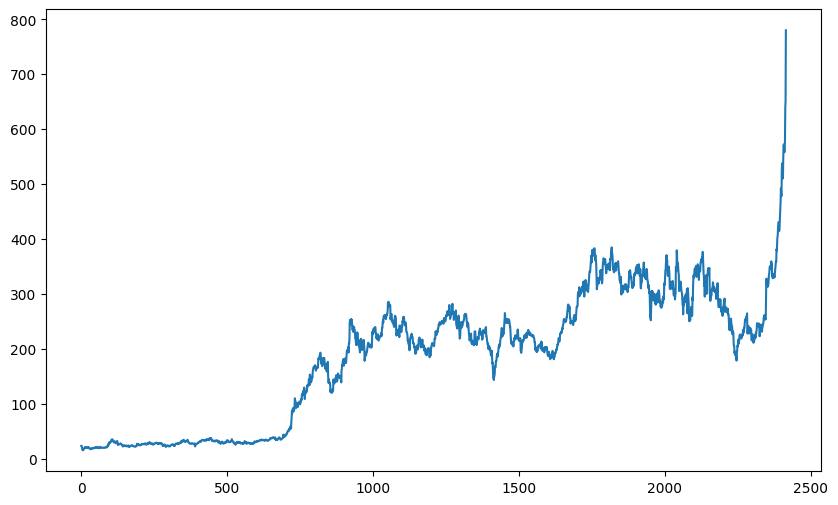

In [5]:
plt.figure(figsize=(10,6))
data['Close'].plot()
plt.show()

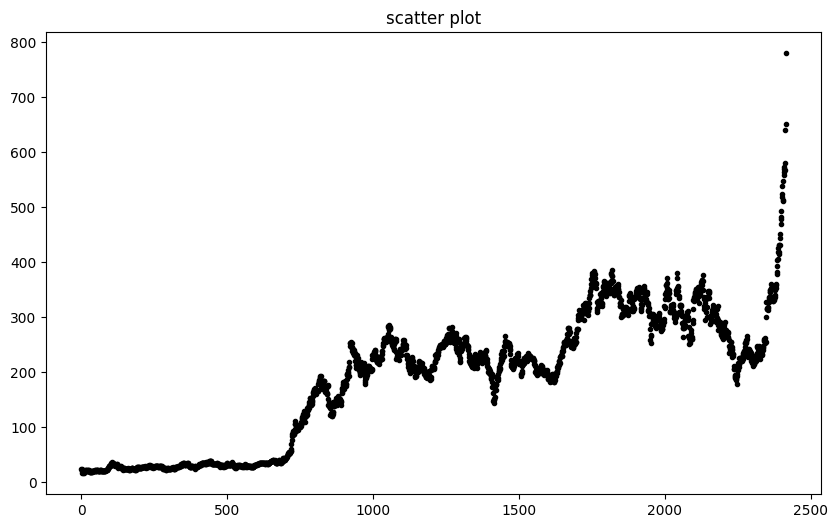

In [6]:
df_close=data['Close']
plt.figure(figsize=(10,6))
df_close.plot(style='k.')
plt.title('scatter plot')
plt.show()

In [7]:
data['price_diff']=data['Close'].shift(-1)-data['Close']
data['price_diff']

,price_diff
0,-0.059999
1,-1.870001
2,-2.759998
3,-3.090000
4,-0.310001
...,...
2411,14.089966
2412,59.820008
2413,9.760009
2414,129.429993


In [8]:
data['daily_rn']=data['price_diff']/data['Close']
data['daily_rn']

,daily_rn
0,-0.002511
1,-0.078473
2,-0.125683
3,-0.160937
4,-0.019243
...,...
2411,0.024854
2412,0.102962
2413,0.015231
2414,0.198949


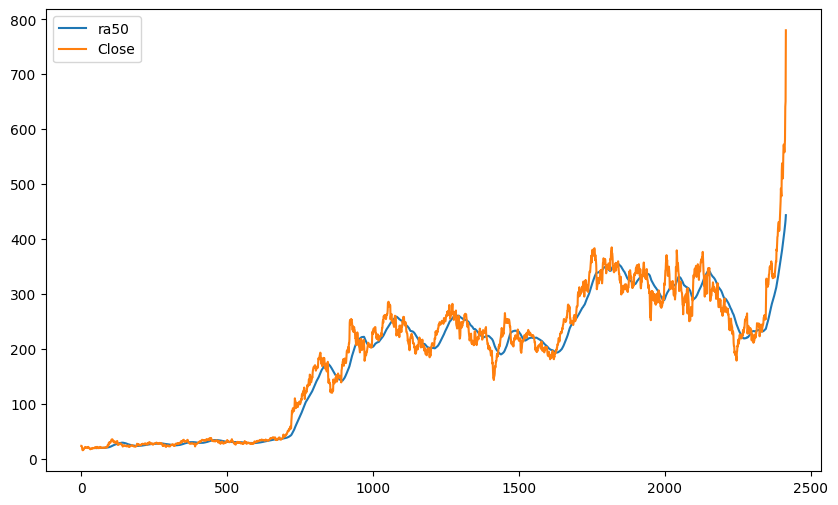

In [9]:
data['ra50']=data['Close'].rolling(50).mean()
plt.figure(figsize=(10,6))
data['ra50'].plot()
data['Close'].plot()
plt.legend()
plt.show()

In [10]:
data['ra50']=data['Close'].rolling(50).mean()
data['ra10']=data['Close'].rolling(10).mean()

In [11]:
data=data.dropna()
data

,Date,Open,High,Low,Close,Adj Close,Volume,price_diff,daily_rn,ra50,ra10
49,2010-09-08,20.660000,20.950001,20.600000,20.900000,20.900000,288400,-0.190001,-0.009091,19.833600,20.270000
50,2010-09-09,21.000000,21.049999,20.690001,20.709999,20.709999,376200,-0.539999,-0.026074,19.770000,20.351000
51,2010-09-10,20.750000,20.930000,19.760000,20.170000,20.170000,386600,0.549999,0.027268,19.696800,20.393000
52,2010-09-13,20.889999,20.900000,20.500000,20.719999,20.719999,360800,0.400002,0.019305,19.672000,20.495000
53,2010-09-14,20.540001,21.600000,20.530001,21.120001,21.120001,654700,0.859999,0.040720,19.710400,20.620000
...,...,...,...,...,...,...,...,...,...,...,...
2410,2020-01-27,541.989990,564.440002,539.280029,558.020020,558.020020,13608100,8.880004,0.015913,414.357601,541.707001
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500,14.089966,0.024854,418.773402,545.911005
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500,59.820008,0.102962,423.406202,550.218005
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700,9.760009,0.015231,429.179001,562.449005


In [12]:
data['Shares']=[1 if data.loc[ei,'ra10']>data.loc[ei,'ra50']else 0 for ei in data.index]

/tmp/ipython-input-12-1658098196.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Shares']=[1 if data.loc[ei,'ra10']>data.loc[ei,'ra50']else 0 for ei in data.index]


/tmp/ipython-input-13-3869828512.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Close1']=data['Close'].shift(-1)
/tmp/ipython-input-13-3869828512.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Profit']=[data.loc[ei,'Close1']-data.loc[ei,'Close']if data.loc[ei,'Shares']==1 else 0 for ei in data.index]


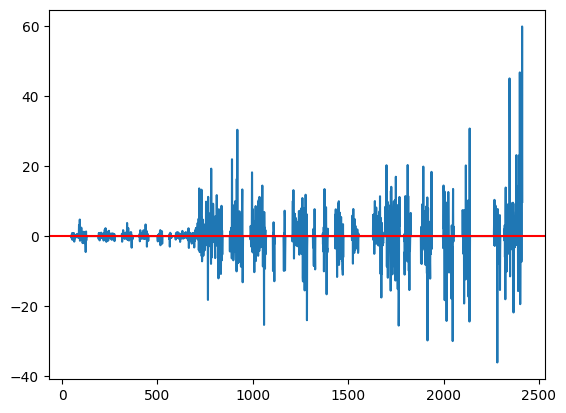

In [13]:
data['Close1']=data['Close'].shift(-1)
data['Profit']=[data.loc[ei,'Close1']-data.loc[ei,'Close']if data.loc[ei,'Shares']==1 else 0 for ei in data.index]
data['Profit'].plot()
plt.axhline(y=0,color='red')

In [14]:
data['log_return']=np.log(data['Close'].shift(-1))-np.log(data['Close'])
data['log_return']

/tmp/ipython-input-14-1058313656.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['log_return']=np.log(data['Close'].shift(-1))-np.log(data['Close'])


,log_return
49,-0.009133
50,-0.026420
51,0.026903
52,0.019121
53,0.039912
...,...
2410,0.015788
2411,0.024551
2412,0.097999
2413,0.015116


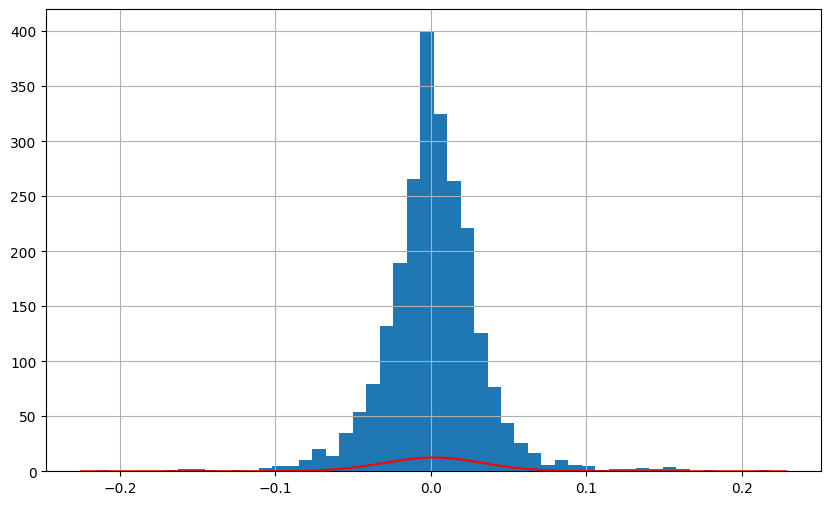

In [16]:
from scipy.stats import norm
mu=data['log_return'].mean()
sigma=data['log_return'].std(ddof=1)

density=pd.DataFrame()
density['x']=np.arange(data['log_return'].min()-0.01,data['log_return'].max()+0.01,0.001)
density['pdf']=norm.pdf(density['x'],mu,sigma)

data['log_return'].hist(bins=50,figsize=(10,6))
plt.plot(density['x'],density['pdf'],color='red')
plt.show()

In [17]:
prob_return=norm.cdf(-0.10,mu,sigma)
print('The probability of dropping over 10% in one day',prob_return)

The probability of dropping over 10% in one day 0.0007272322154809123


In [20]:
mu220=365*mu
sigma220=(365**0.5)*sigma
drop20=None
print('The probability of dropping over 25% over a year:',drop20)

The probability of dropping over 25% over a year: None


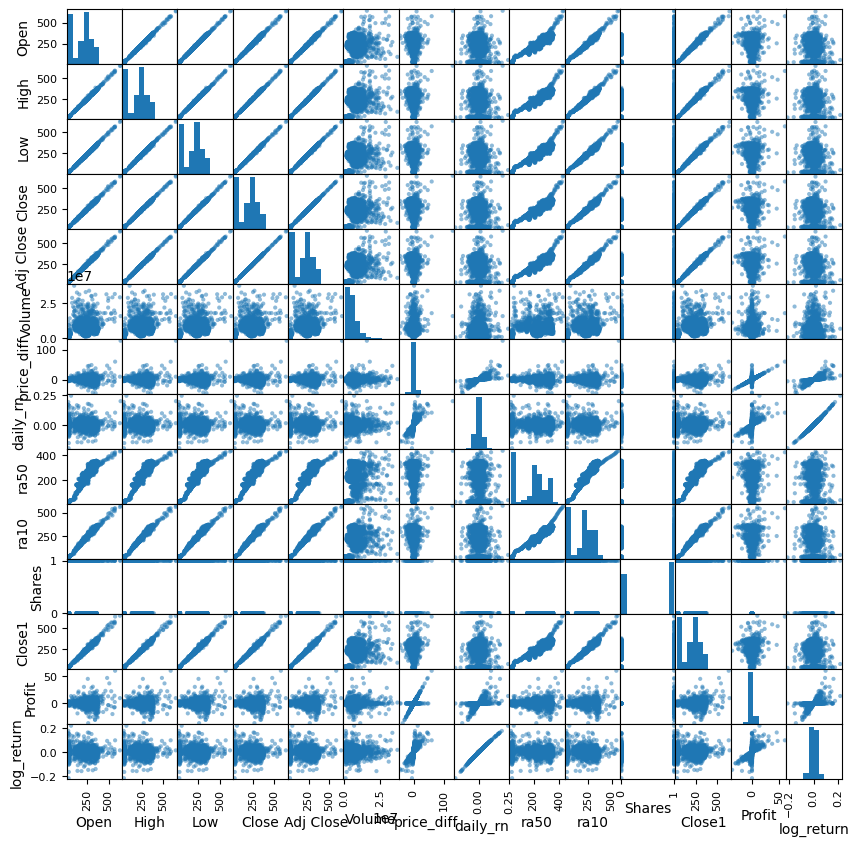

In [22]:
from pandas.plotting import scatter_matrix
sm=scatter_matrix(data,figsize=(10,10))